# 2.10 Assignment 2: Linear Regression and Gradient Descent (Graded) 
The dataset has the following attributes:
1. Airline
2. Length of flight (miles)
3. Speed of plane (miles per hour)
4. Daily flight time per plane (hours)
5. Population served (1000s)
6. Total operating cost (cents per revenue ton-mile)
7. Revenue tons per aircraft mile
8. Ton-mile load factor (proportion)
9. Available capacity (tons per mile)
10. Total assets (100,000s)
11. Investments and special funds (100,000s)
12. Adjusted assets (100,000s)

## INSTRUCTIONS
### Part A [3 Points]
Use a linear regression model to predict the number of customers each airline serves from its length of the flight and daily flight time per plane.<p>
Report your model (linear equation).<p>
What is your predicted value for the number of customers served for a flight that is 200 miles in length and has a daily flight time per plane of 7.2 hours?

### Part B [3 Points]
Next, build another regression model to predict the total assets of an airline from the customer served by the airline. Report your model.<p>
What is your prediction for total assets for an airline, given they serve 20,300,000 customers?<p>

## Problem 2 [4 points]
In this exercise, you are going to use the kangaroo’s nasal dimension data. Download kangaroo’s nasal dimension data.
### INSTRUCTIONS
Use the gradient descent algorithm to predict the optimal intercept and gradient for this problem. Report your gradient values. 

### SUBMISSION
Submit a single PDF file with no more than three pages with your analyses, outcomes, and insights. Do not add your code or screen-dumps. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [6]:
df_airline = pd.read_csv('Assignment 2—Problem 1_ airline_costs.csv', header=None)
print(df_airline.columns)
df_airline.columns = ['airline', 'flight_miles', 'miles_per_hour', 'flight_hours', 'population', 'operate_cost', 
              'revenue_tons', 'ton_mile_load_factor', 'capacity_tons_per_mile', 'total_assets', 'investments_funds', 
              'adjusted_assets']
display(df_airline)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')


,airline,flight_miles,miles_per_hour,flight_hours,population,operate_cost,revenue_tons,ton_mile_load_factor,capacity_tons_per_mile,total_assets,investments_funds,adjusted_assets
0,All American,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96
5,Central,51,134,4.67,1757,318.5,0.35,0.167,2.096,14.02,0.01,14.01
6,C&S,175,175,8.60,18000,59.2,2.17,0.558,3.889,114.16,3.11,111.05
7,Colonial,112,150,6.87,13500,77.0,1.68,0.505,3.327,35.34,0.79,34.55
8,Continental,131,179,6.50,3831,62.3,1.70,0.537,3.166,49.74,3.49,46.25
9,Delta,174,191,7.60,13119,45.3,2.74,0.598,4.582,174.32,3.87,170.45


In [7]:
df_airline.describe()

,flight_miles,miles_per_hour,flight_hours,population,operate_cost,revenue_tons,ton_mile_load_factor,capacity_tons_per_mile,total_assets,investments_funds,adjusted_assets
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,129.096774,161.258065,6.463226,14491.967742,113.506452,1.732258,0.476290,3.306806,215.310968,20.312581,194.998387
std,73.212638,26.851403,1.549586,16824.247836,142.704637,1.191852,0.139171,1.689303,402.655569,48.770618,357.849189
min,45.000000,116.000000,2.350000,183.000000,42.300000,0.070000,0.166000,0.422000,2.030000,0.010000,1.410000
25%,71.000000,141.500000,5.865000,2500.000000,50.800000,0.800000,0.399000,2.119500,13.230000,0.025000,13.220000
50%,100.000000,150.000000,6.600000,6500.000000,75.400000,1.190000,0.505000,2.405000,21.600000,2.110000,19.100000
75%,174.500000,181.500000,7.260000,19100.000000,120.750000,2.680000,0.568500,4.598000,167.310000,5.935000,159.810000
max,293.000000,216.000000,9.500000,56928.000000,820.900000,4.300000,0.689000,7.544000,1436.530000,187.840000,1271.310000


# Part A
An Ordinary Least Squares Model should work for this prediction using the formula:<p>
$\text{Population Served} = \beta_0 + \beta_1*\text{flight miles} + \beta_2*\text{flight hours} + \epsilon$

In [8]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df_airline, test_size=0.2, random_state=42)

# Train the linear regression model on the training data
model = smf.ols('population ~ flight_miles + flight_hours', data=train_df)
results = model.fit()

# Print the summary of the model trained on the training data
print("Summary of the model trained on the training data:")
print(results.summary())

# You can now use the 'results' object to make predictions on the test data
predictions = results.predict(test_df[['flight_miles', 'flight_hours']])

# Evaluate the model's performance on the test data (this is crucial)
mse = mean_squared_error(test_df['population'], predictions)
r2 = r2_score(test_df['population'], predictions)

print("\nPerformance on the test data:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Summary of the model trained on the training data:
                            OLS Regression Results                            
Dep. Variable:             population   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     21.26
Date:                Sun, 04 May 2025   Prob (F-statistic):           8.97e-06
Time:                        11:29:57   Log-Likelihood:                -256.11
No. Observations:                  24   AIC:                             518.2
Df Residuals:                      21   BIC:                             521.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [9]:
# Make the prediction using the trained model
new_flight_miles = 200
new_flight_hours = 7.2
predicted_customers = results.predict(pd.DataFrame({'flight_miles': [new_flight_miles],'flight_hours': [new_flight_hours]}))
print(f"Predicted number of customers served for a 200 mile flight that is 7.2 hours: {predicted_customers.iloc[0]:,.0f}")

Predicted number of customers served for a 200 mile flight that is 7.2 hours: 29,079


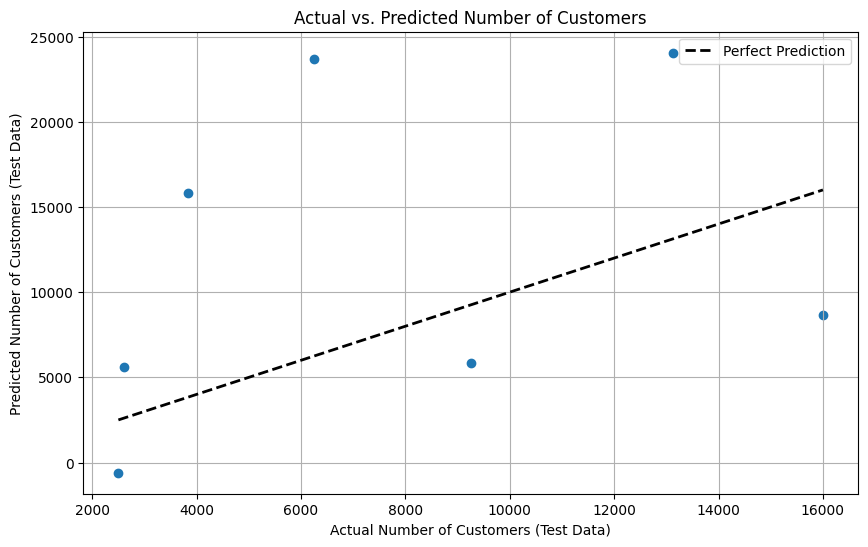

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# Assuming your DataFrame is named 'df_airline'
# and has columns 'number_of_customers', 'length_of_flight', and 'daily_flight_time'

# 1. Split the data into training and testing sets
train_df, test_df = train_test_split(df_airline, test_size=0.2, random_state=42)

# 2. Train the linear regression model on the training data
model = smf.ols('population ~ flight_miles + flight_hours', data=train_df)
results = model.fit()

# 3. Make predictions on the test data
predictions = results.predict(test_df[['flight_miles', 'flight_hours']])

# 4. Create the scatter plot of predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(test_df['population'], predictions)

# Add a diagonal line representing perfect predictions
plt.plot(
    [test_df['population'].min(), test_df['population'].max()],
    [test_df['population'].min(), test_df['population'].max()],
    'k--',
    linewidth=2,
    label='Perfect Prediction'
)

plt.xlabel('Actual Number of Customers (Test Data)')
plt.ylabel('Predicted Number of Customers (Test Data)')
plt.title('Actual vs. Predicted Number of Customers')
plt.grid(True)
plt.legend()
plt.show()

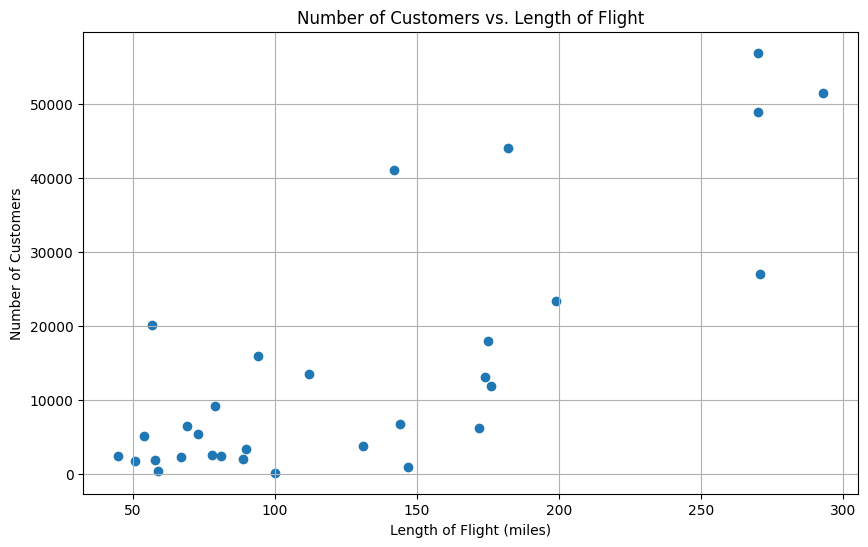

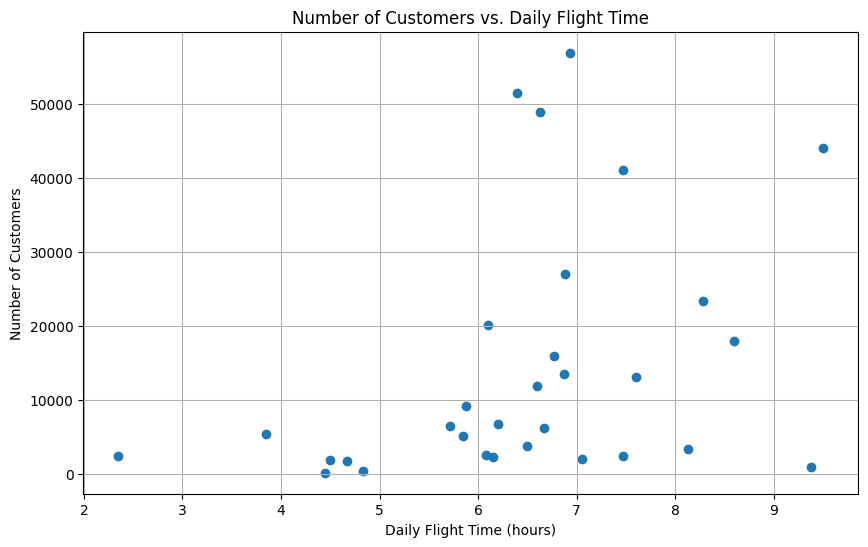

In [11]:
# Assuming your DataFrame is named 'df_airline'
# and has columns 'number_of_customers', 'length_of_flight', and 'daily_flight_time'

# Scatter plot of 'number_of_customers' vs 'length_of_flight'
plt.figure(figsize=(10, 6))
plt.scatter(df_airline['flight_miles'], df_airline['population'])
plt.xlabel('Length of Flight (miles)')
plt.ylabel('Number of Customers')
plt.title('Number of Customers vs. Length of Flight')
plt.grid(True)
plt.show()

# Scatter plot of 'number_of_customers' vs 'daily_flight_time'
plt.figure(figsize=(10, 6))
plt.scatter(df_airline['flight_hours'], df_airline['population'])
plt.xlabel('Daily Flight Time (hours)')
plt.ylabel('Number of Customers')
plt.title('Number of Customers vs. Daily Flight Time')
plt.grid(True)
plt.show()

# Part B

In [14]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df_airline, test_size=0.2, random_state=42)

# Train the linear regression model on the training data
model = smf.ols('adjusted_assets ~ population', data=train_df)
results = model.fit()

# Print the summary of the model trained on the training data
print("Summary of the model trained on the training data:")
print(results.summary())

# You can now use the 'results' object to make predictions on the test data
predictions = results.predict(test_df[['population']])

# Evaluate the model's performance on the test data (this is crucial)
mse = mean_squared_error(test_df['adjusted_assets'], predictions)
r2 = r2_score(test_df['adjusted_assets'], predictions)

print("\nPerformance on the test data:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Summary of the model trained on the training data:
                            OLS Regression Results                            
Dep. Variable:        adjusted_assets   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     106.7
Date:                Sun, 04 May 2025   Prob (F-statistic):           6.64e-10
Time:                        11:32:01   Log-Likelihood:                -156.04
No. Observations:                  24   AIC:                             316.1
Df Residuals:                      22   BIC:                             318.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

In [16]:
# Make the prediction using the trained model
new_pop_served = 20300000
predicted_assets = results.predict(pd.DataFrame({'population': [new_pop_served]}))
print(f"Prediction for total assets (100,000s) for an airline, given they serve 20,300,000 customers: {predicted_assets.iloc[0]:,.0f}")

Prediction for total assets (100,000s) for an airline, given they serve 20,300,000 customers: 397,266


# Problem 2

In [6]:
df = pd.read_excel('Assignment_2-Problem_2-kangaroo_nasal_dimension_data.xls', engine='xlrd')
print(df.columns)
display(df)

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
Index(['X', 'Y'], dtype='object')


,X,Y
0,609,241
1,629,222
2,620,233
3,564,207
4,645,247
5,493,189
6,606,226
7,660,240
8,630,215
9,672,231


In [18]:
print(df.describe())

                X           Y
count   45.000000   45.000000
mean   687.400000  244.155556
std     92.626915   30.224881
min    493.000000  189.000000
25%    616.000000  220.000000
50%    677.000000  237.000000
75%    755.000000  272.000000
max    864.000000  308.000000


In [19]:
# Test with OLS first to validate Gradient Descent

# Train the linear regression model on the training data
model = smf.ols('Y ~ X', data=df)
results = model.fit()

# Print the summary of the model trained on the training data
print("Summary of the model trained on the training data:")
print(results.summary())

Summary of the model trained on the training data:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     149.7
Date:                Sun, 04 May 2025   Prob (F-statistic):           1.34e-15
Time:                        11:32:26   Log-Likelihood:                -182.98
No. Observations:                  45   AIC:                             370.0
Df Residuals:                      43   BIC:                             373.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

In [7]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    Returns the final theta vector and array of cost history over no of iterations
    '''
    n = len(y)
    num_theta = X.shape[1]
    cost_history = np.zeros(iterations)
   # theta_history = np.zeros((iterations,2))
    theta_history = np.zeros((iterations,num_theta))
    for it in range(iterations):
        prediction = np.dot(X,theta)
        theta = theta -(1/n)*learning_rate*(X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cost_fun(theta,X,y)
    return theta, cost_history, theta_history    

def cost_fun(theta,X,y):
    '''Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1)) only for simple regression
    where:
        j is the no of features
    '''
    n = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*n)) * np.sum((predictions-y)**2)
    return cost

In [8]:
def gradient_descent_2(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    num_theta = theta.shape[0]
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, num_theta))

    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost = (1/(2*m)) * np.sum(np.square(prediction - y))
        cost_history[it] = cost

    return theta, cost_history, theta_history

In [8]:
# Assuming your DataFrame 'df' with columns 'X' and 'Y' is already loaded

# Prepare the data
X = df['X'].values.reshape(-1, 1)  # Reshape X to be a column vector (m, 1)
y = df['Y'].values.reshape(-1, 1)
m = len(y)

# Scale X and y
X_scaled = (X - X.mean()) / X.std()
y_scaled = (y - y.mean()) / y.std()

# Add bias term
X_b = np.c_[np.ones((m, 1)), X_scaled]

# Reset theta
theta = np.zeros((2, 1))

num_features = X.shape[1]  # Number of features (should be 1)

# Initialize parameters (coefficients)
learning_rate = 0.00001
iterations = 10000

# Train the model using Gradient Descent
theta_final, cost_history, theta_history = gradient_descent_2(X_b, y_scaled, theta, learning_rate, iterations)

# Get the learned coefficients
intercept_gd = float(theta_final[0])
slope_x_gd = float(theta_final[1])

# Convert scaled coefficients back to original units
slope = (y.std() / X.std()) * theta_final[1, 0]
intercept = y.mean() - slope * X.mean()

print("Gradient Descent Model Coefficients:")
print(f"Intercept: {intercept:.4f}")
print(f"Slope (X): {slope:.4f}")

Gradient Descent Model Coefficients:
Intercept: 225.3414
Slope (X): 0.0274


C:\Users\steve\AppData\Local\Temp\ipykernel_39360\459918960.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept_gd = float(theta_final[0])
C:\Users\steve\AppData\Local\Temp\ipykernel_39360\459918960.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope_x_gd = float(theta_final[1])


# Use this Gradient Descent Formula

In [9]:
import numpy as np
import pandas as pd

def gradient_descent_3(X, y, theta, learning_rate=0.01, iterations=1000):
    '''
    X     = Matrix of X with added bias units
    y     = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = number of iterations
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, theta.shape[0]))
    for it in range(iterations):
        prediction = X.dot(theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot(prediction - y))
        cost = (1/(2*m)) * np.sum((prediction - y)**2)
        theta_history[it, :] = theta.T
        cost_history[it] = cost
    return theta, cost_history, theta_history

# Prepare the data
X = df['X'].values.reshape(-1, 1)
y = df['Y'].values.reshape(-1, 1)
m = len(y)

# Standardize X and y
X_mean, X_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()
X_scaled = (X - X_mean) / X_std
y_scaled = (y - y_mean) / y_std

# Add bias column
X_b = np.c_[np.ones((m, 1)), X_scaled]

# Initialize theta
theta = np.zeros((2, 1))

# Set hyperparameters
learning_rate = 0.1  # Try this or even 0.3
iterations = 1000    # That's enough if learning rate is solid

# Train using gradient descent
theta_final, cost_history, theta_history = gradient_descent_3(X_b, y_scaled, theta, learning_rate, iterations)

# Recover coefficients in original scale
slope = (y_std / X_std) * theta_final[1, 0]
intercept = y_mean - slope * X_mean

# Print results
print("Gradient Descent Model Coefficients (original units):")
print(f"Intercept: {intercept:.4f}")
print(f"Slope (X): {slope:.4f}")

Gradient Descent Model Coefficients (original units):
Intercept: 46.4508
Slope (X): 0.2876


In [23]:
X_b

array([[ 1.        , -0.85597046],
       [ 1.        , -0.63761065],
       [ 1.        , -0.73587257],
       [ 1.        , -1.34728004],
       [ 1.        , -0.4629228 ],
       [ 1.        , -2.12245738],
       [ 1.        , -0.88872444],
       [ 1.        , -0.29915294],
       [ 1.        , -0.62669266],
       [ 1.        , -0.16813706],
       [ 1.        ,  0.98916995],
       [ 1.        , -0.77954453],
       [ 1.        ,  0.43235243],
       [ 1.        ,  1.33854565],
       [ 1.        ,  0.98916995],
       [ 1.        ,  1.48047953],
       [ 1.        ,  0.73805617],
       [ 1.        ,  0.24674659],
       [ 1.        ,  0.14848467],
       [ 1.        ,  1.26211972],
       [ 1.        ,  1.82985523],
       [ 1.        ,  1.64424939],
       [ 1.        ,  1.55690546],
       [ 1.        ,  1.92811714],
       [ 1.        , -0.57210271],
       [ 1.        , -1.33636205],
       [ 1.        , -1.36911602],
       [ 1.        , -1.17259219],
       [ 1.        ,

-1: Incorrect gradient and slope values. Optimal Parameters: Slope (m): 0.2875. Intercept (b): 46.5011<p>
$\text{Predicted Y} = \text{Intercept} + \text{Slope (X)} \times \text{X}$

In [ ]:
import numpy as np

def mean_squared_error(y_true, y_predicted):
  """Calculates the Mean Squared Error.

  Args:
    y_true: NumPy array of true target values.
    y_predicted: NumPy array of predicted target values.

  Returns:
    The Mean Squared Error (float).
  """
  m = len(y_true)
  squared_errors = (y_predicted - y_true) ** 2
  mse = np.sum(squared_errors) / m
  return mse

# Assuming you have:
# - X_b: Your feature matrix (with the intercept column)
# - y: Your true target values
# - theta_final: The learned coefficients from Gradient Descent

# 1. Make predictions using the learned coefficients
y_predicted_gd = np.dot(X_b, theta_final)

# 2. Calculate the Mean Squared Error
mse_gd = mean_squared_error(y, y_predicted_gd)

print(f"Mean Squared Error (Gradient Descent): {mse_gd:.4f}")